In [1]:
cd /Users/kalyani/Documents/Study/Python/Sentiment_Analysis

/Users/kalyani/Documents/Study/Python/Sentiment_Analysis


In [2]:
import re
import string

In [3]:
file_trump = open('Trump.txt', 'r')  # open file containing trump tweets
file_brexit = open('Brexit.txt', 'r') # open file containing brexit tweets


In [4]:
file_read_t = file_trump.read().lower() 
file_read_b = file_brexit.read().lower()

In [5]:
stop = open('stopwords.txt', encoding = "UTF-8")

In [6]:
stop.seek(0)

0

In [7]:
file_stop = stop.read().split()

In [8]:
#file_read

# Data Cleaning

In [9]:
# clean file containing trump tweets
file_read_t = re.sub('\\\\x[A-Za-z0-9./]*','',file_read_t)
file_read_t = re.sub("https:[A-Za-z0-9./]+",'',file_read_t)
file_read_t = re.sub("@[A-Za-z0-9./]+",'',file_read_t)
file_read_t = re.sub('\\\\n',' ',file_read_t)
file_read_t = re.sub("[-#!$%^&*/?,)\\\\(.<>_:;\'\"]+",' ',file_read_t)
file_read_t = re.sub('b rt','',file_read_t)
file_read_t = re.sub("[0-9]",'',file_read_t)

# clean file containing brexit tweets
file_read_b = re.sub('\\\\x[A-Za-z0-9./]*','',file_read_b)
file_read_b = re.sub("https:[A-Za-z0-9./]+",'',file_read_b)
file_read_b = re.sub("@[A-Za-z0-9./]+",'',file_read_b)
file_read_b = re.sub('\\\\n',' ',file_read_b)
file_read_b = re.sub("[-#!$%^&*/?,)\\\\(.<|>_:;\'\"]+",' ',file_read_b)
file_read_b = re.sub('b rt','',file_read_b)
file_read_b = re.sub("[0-9]",'',file_read_b)

In [10]:
#file_read

In [11]:
file_words_t = file_read_t.split()
file_words_b = file_read_b.split()


In [12]:
#file_words

In [13]:
read_t = []
for words_t in file_words_t:
    if words_t == '':
        continue
    if len(words_t) == 1:
        continue
    #if words in file_stop:
     #   continue
    read_t.append(words_t)
    
    
read_b = []
for words_b in file_words_b:
    if words_b == '':
        continue
    if len(words_b) == 1:
        continue
    read_b.append(words_b)

In [14]:
#read

In [15]:
pos = open('positive.txt','r')

In [16]:
pos.seek(0)

0

In [17]:
file_pos= pos.read().split()

In [18]:
neg = open('negative.txt', encoding = "ISO-8859-1")

In [19]:
neg.seek(0)

0

In [20]:
file_neg= neg.read().split()

# Analyze Sentiments

In [21]:
# Analysis for Trump keyword

positive_t = 0
negative_t = 0
stop_t = 0
for words_t in read_t:
    if words_t in file_pos:
        positive_t += 1
    elif words_t in file_neg:
        negative_t -= 1
    elif words_t in file_stop:
        stop_t += 1

print("Trump:")        
print ("Positive Count: "+str(positive_t))
print ("Negative Count: "+str(negative_t))
print ("Stop words Count:"+str(stop_t))
print("-------------------------------------------------------------------------------------------------------")

# Analysis for Brexit keyword

positive_b = 0
negative_b = 0
stop_b = 0
for words_b in read_b:
    if words_b in file_pos:
        positive_b += 1
    elif words_b in file_neg:
        negative_b -= 1
    elif words_b in file_stop:
        stop_b += 1

print("\nBrexit:")        
print ("Positive Count: "+str(positive_b))
print ("Negative Count: "+str(negative_b))
print ("Stop words Count:"+str(stop_b))

Trump:
Positive Count: 7935
Negative Count: -14332
Stop words Count:142381
-------------------------------------------------------------------------------------------------------

Brexit:
Positive Count: 852
Negative Count: -1442
Stop words Count:15401


In [22]:
total_words_t = len(read_t)
other_words_t = total_words_t - (positive_t-negative_t+stop_t)
print("Trump:") 
print ("Total Word Count: "+str(total_words_t))
print("Other Word Count: "+str(other_words_t))
print("-------------------------------------------------------------------------------------------------------")

total_words_b = len(read_b)
other_words_b = total_words_b - (positive_b-negative_b+stop_b)
print("\nBrexit:") 
print ("Total Word Count: "+str(total_words_b))
print("Other Word Count: "+str(other_words_b))

Trump:
Total Word Count: 293884
Other Word Count: 129236
-------------------------------------------------------------------------------------------------------

Brexit:
Total Word Count: 31010
Other Word Count: 13315


In [23]:
positive_ratio_t = (positive_t/total_words_t)
negative_ratio_t = (negative_t*-1/total_words_t)
stop_ratio_t = (stop_t/total_words_t)
other_ratio_t = (other_words_t/total_words_t)
print("Trump:") 
print ("Positive Ratio: "+str(positive_ratio_t))
print ("Negative Ratio: "+str(negative_ratio_t))
print ("Stop Ratio: "+str(stop_ratio_t))
print ("Other Ratio: "+str(other_ratio_t))
print("-------------------------------------------------------------------------------------------------------")

positive_ratio_b = (positive_b/total_words_b)
negative_ratio_b = (negative_b*-1/total_words_b)
stop_ratio_b = (stop_b/total_words_b)
other_ratio_b = (other_words_b/total_words_b)
print("\nBrexit:") 
print ("Positive Ratio: "+str(positive_ratio_b))
print ("Negative Ratio: "+str(negative_ratio_b))
print ("Stop Ratio: "+str(stop_ratio_b))
print ("Other Ratio: "+str(other_ratio_b))

Trump:
Positive Ratio: 0.02700044915681017
Negative Ratio: 0.048767540934518384
Stop Ratio: 0.48448027112738357
Other Ratio: 0.43975173878128787
-------------------------------------------------------------------------------------------------------

Brexit:
Positive Ratio: 0.02747500806191551
Negative Ratio: 0.046501128668171555
Stop Ratio: 0.4966462431473718
Other Ratio: 0.4293776201225411


In [24]:
print("Trump:")

if positive_ratio_t > negative_ratio_t:
    print("The sentiment is Positive")
    if positive_t/(positive_t-negative_t) > 0.5:
        print("Strongly")
    elif positive_t/(positive_t-negative_t) < 0.5:
        print("Weakly")
    else:
        print("Neutral")
elif positive_ratio_t < negative_ratio_t:
    print("The sentiment is Negative")
    if -negative_t/(positive_t-negative_t) > 0.5:
        print("Strongly")
    elif -negative_t/(positive_t-negative_t) < 0.5:
        print("Weakly")
    else:
        print("Neutral")
else:
    print("The sentiment is Neutral")

print("-------------------------------------------------------------------------------------------------------")

    
    
print("\nBrexit:")   
if positive_ratio_b > negative_ratio_b:
    print("The sentiment is Positive")
    if positive_b/(positive_b-negative_b) > 0.5:
        print("Strongly")
    elif positive_b/(positive_b-negative_b) < 0.5:
        print("Weakly")
    else:
        print("Neutral")
elif positive_ratio_b < negative_ratio_b:
    print("The sentiment is Negative")
    if -negative_b/(positive_b-negative_b) > 0.5:
        print("Strongly")
    elif -negative_b/(positive_b-negative_b) < 0.5:
        print("Weakly")
    else:
        print("Neutral")
else:
    print("The sentiment is Neutral")

Trump:
The sentiment is Negative
Strongly
-------------------------------------------------------------------------------------------------------

Brexit:
The sentiment is Negative
Strongly


In [25]:
#positive/(positive-negative)   # Subtraction because negative is in negative value(-) and since we need addition 
                               # we subtract it

In [26]:
#-negative/(positive-negative)

# Visualization

In [27]:
import matplotlib.pyplot as plt_t

slices = [positive_ratio_t,negative_ratio_t,stop_ratio_t,other_ratio_t]
labels = ['Positive','Negative','Stop','Other']
colors = ['g','r','y','b']


plt_t.pie(slices,labels=labels,colors=colors,startangle = 0, autopct = "%1.1f%%")
plt_t.axis('equal')
plt_t.title("Trump",bbox={'facecolor':'0.8','pad':5})
plt_t.show()

<Figure size 640x480 with 1 Axes>

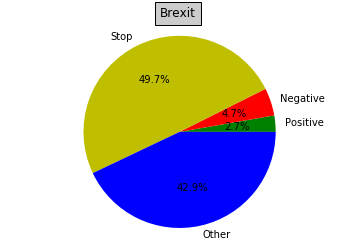

In [29]:
import matplotlib.pyplot as plt_b

slices = [positive_ratio_b,negative_ratio_b,stop_ratio_b,other_ratio_b]
labels = ['Positive','Negative','Stop','Other']
colors = ['g','r','y','b']

plt_b.pie(slices,labels=labels,colors=colors,startangle = 0, autopct = "%1.1f%%")
plt_b.axis('equal')
plt_b.title("Brexit",bbox={'facecolor':'0.8','pad':5})
plt_b.show()